# A simple example of the marching tetrahedron algorithm

In [145]:
# Fucntions of the whole file

import numpy as np
import matplotlib.pyplot as plt

def get_number_from_global_coord(global_coord):
    # if type(global_coord) != "tuple":
    #     raise ValueError

    new_coord = np.zeros((3), dtype=int)
    new_coord[0] = global_coord[0] % 2
    new_coord[1] = global_coord[1] % 2
    new_coord[2] = global_coord[2] % 2

    new_coord = str(new_coord)

    inv_conversion_table = {
        "[0 0 0]": 1,
        "[1 0 0]": 2,
        "[0 1 0]": 3,
        "[1 1 0]": 4,
        "[0 0 1]": 5,
        "[1 0 1]": 6,
        "[0 1 1]": 7,
        "[1 1 1]": 8
    }

    return inv_conversion_table[new_coord]

def from_point_globalcube_to_local_global_point(point, block_coordinate):
    if point < 1:
        raise ValueError("Number must be >= 1")

    conversion_table = [ # Note that this pattern is the 0-7 in binary from right to left
        ("i'", "j'", "k'"),
        ("i''", "j'", "k'"),
        ("i'", "j''", "k'"),
        ("i''", "j''", "k'"),
        ("i'", "j'", "k''"),
        ("i''", "j'", "k''"),
        ("i'", "j''", "k''"),
        ("i''", "j''", "k''"),
    ]

    # I want to find the 7th point of the block_coordinate = (0,0,0) cube

    one_apex = np.zeros((3), dtype = int)
    two_apex = np.zeros((3), dtype = int)
    global_coordinate = np.zeros((3), dtype = int)
    local_coordinate = np.zeros((3), dtype = int)

    for var in range(3):
        if block_coordinate[var] % 2 == 0:
            one_apex[var] = block_coordinate[var]
        else:
            one_apex[var] = block_coordinate[var]+1
        
        two_apex[var] = 2*block_coordinate[var]+1-one_apex[var]

        if conversion_table[point-1][var] == "i'" or conversion_table[point-1][var] == "j'" or conversion_table[point-1][var] == "k'":
            global_coordinate[var] = one_apex[var]
        else:
            global_coordinate[var] = two_apex[var]
        local_coordinate[var] = global_coordinate[var]-block_coordinate[var]

    return local_coordinate, global_coordinate

def from_vertex_connectivity_to_coord_connectivity(cube_connectivity, cube_coordinate):
    global_coordinate_cube_connectivity=[]
    for couple in cube_connectivity:
        tmp = []
        for i in couple:
            _, global_coordinate = from_point_globalcube_to_local_global_point(i, cube_coordinate)
            tmp.append(global_coordinate)
        global_coordinate_cube_connectivity.append(tuple(tmp))
    return global_coordinate_cube_connectivity

def add_connectivity(name):
    tetrahedra_connectivity = []

    for tetrahedron in name:
        for i in range(4):
            for j in range(i+1, 4):
                tetrahedra_connectivity.append((tetrahedron[i], tetrahedron[j]))

    return tetrahedra_connectivity

/tmp/ipykernel_11306/63852241.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(i, j, k, c=plt.cm.viridis(grid[i, j, k] / grid.max()), marker='o')


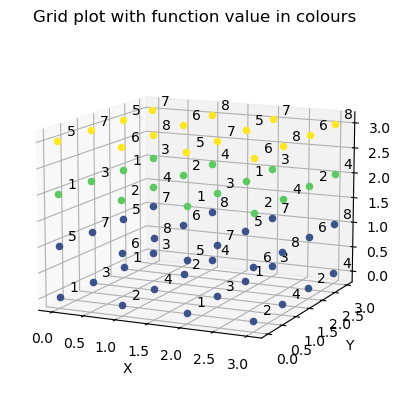

/tmp/ipykernel_11306/63852241.py:51: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(i, j, k, c=plt.cm.viridis(grid[i, j, k] / grid.max()), marker='o')


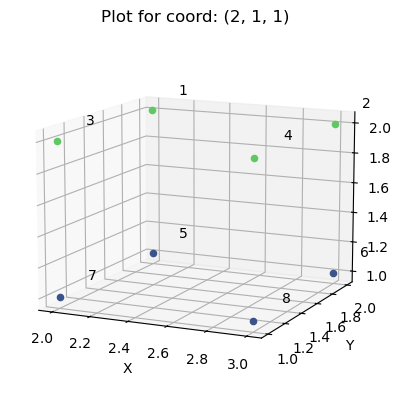

/tmp/ipykernel_11306/63852241.py:74: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(i, j, k, c=plt.cm.viridis(grid[i, j, k] / grid.max()), marker='o')


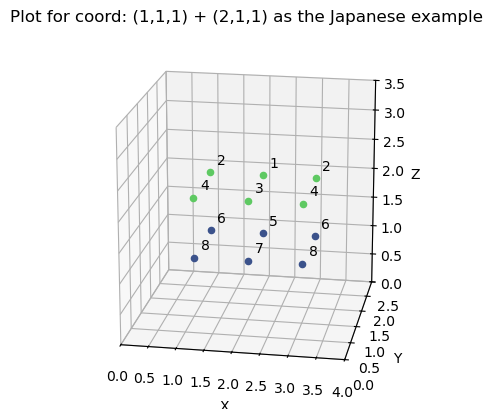

In [ ]:
# Use a 3x3x3 grid

# Create a 3x3x3 grid of zeros
n = 3
c = n+0.5
grid = np.ones((n+1, n+1, n+1), dtype=float)

for k in range (0, n+1):
    for j in range (0, n+1):
        for i in range (0, n+1):
            if k == n-1:
                grid[i,j,k] = n
            elif k == n:
                grid[i,j,k] = n+1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
spacing = 0.1

# Plot the grid points with color based on the value of the grid
for i in range(n+1):
    for j in range(n+1):
        for k in range(n+1):
            ax.scatter(i, j, k, c=plt.cm.viridis(grid[i, j, k] / grid.max()), marker='o')
            ax.text(i+spacing, j+spacing, k+spacing, f'{get_number_from_global_coord((i,j,k))}', color='black')

ax.view_init(elev=12., azim=295)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title("Grid plot with function value in colours")

plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
spacing = 0.1

coord = (2,1,1)

# Plot the grid points with color based on the value of the grid
for i in range(coord[0], coord[0]+2):
    for j in range(coord[1], coord[1]+2):
        for k in range(coord[2], coord[2]+2):
            ax.scatter(i, j, k, c=plt.cm.viridis(grid[i, j, k] / grid.max()), marker='o')
            ax.text(i+spacing, j+spacing, k+spacing, f'{get_number_from_global_coord((i,j,k))}', color='black')

ax.view_init(elev=12., azim=295)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title(f'Plot for coord: {coord}')

plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
spacing = 0.1

coord = (1,1,1)
# Plot the grid points with color based on the value of the grid
for i in range(coord[0], coord[0]+3):
    for j in range(coord[1], coord[1]+2):
        for k in range(coord[2], coord[2]+2):
            ax.scatter(i, j, k, c=plt.cm.viridis(grid[i, j, k] / grid.max()), marker='o')
            ax.text(i+spacing, j+spacing, k+spacing, f'{get_number_from_global_coord((i,j,k))}', color='black')

ax.view_init(elev=18., azim=280)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the same axis length for isotropic view
ax.set_box_aspect([1,1,1])  # Aspect ratio is 1:1:1

ax.set_xlim([0, 4])
ax.set_ylim([0, 2.5])
ax.set_zlim([0, 3.5])

ax.set_title(f'Plot for coord: (1,1,1) + (2,1,1) as the Japanese example')

plt.show()

In [119]:
# I have the position of each cube as (i,j,k) where i is the x position, j is the y position, and k is the z position
# I can compute the relative position with the following rule:
# i' = i if i is even, i' = i+1 else. Applies for j and k as well
# i'' = 2*i+1-i'. Applies for j and k as well

# Compute the (0,0,0) 

block_coordinate = (2,0,0)
point = 5 # From 1 to 8


    
local_coordinate, global_coordinate = from_point_globalcube_to_local_global_point(point, block_coordinate)
print("Global coordinate of the block number", str(point), "with block position block_coordinate", str(block_coordinate), "in the global grid" )
print(global_coordinate)
print("The local coordinate within the block is at:" )
print(local_coordinate)

Global coordinate of the block number 5 with block position block_coordinate (2, 0, 0) in the global grid
[2 0 1]
The local coordinate within the block is at:
[0 0 1]


In [120]:
    

print("Global coordinate of the block number", str(point), "with block position block_coordinate", str(block_coordinate), "in the global grid" )
print(global_coordinate)
print("The local coordinate within the block is at:" )
print(local_coordinate)

Global coordinate of the block number 5 with block position block_coordinate (2, 0, 0) in the global grid
[2 0 1]
The local coordinate within the block is at:
[0 0 1]


In [121]:
# Now I need the reverse, i.e.: from a coordinate I want to know the number among its block vertices
# For example. I know the the vertex 8 in the cube at location (2,1,0) is at position (3,1,1)

# Now, from (3,1,1) I want to go back to 8  

# I leverage the fact that the cubes are mirrored among each other on every face. A cube has the same tetrahedron
# configuration of the next-next one in every direction


global_coord_vertex = (3,3,2)
new_coord = np.zeros((3), dtype=int)

new_coord[0] = global_coord_vertex[0] % 2
new_coord[1] = global_coord_vertex[1] % 2
new_coord[2] = global_coord_vertex[2] % 2

print(new_coord)
new_coord = str(new_coord)

inv_conversion_table_1 = {
    "[0 0 0]": 1,
    "[1 0 0]": 2,
    "[0 1 0]": 3,
    "[1 1 0]": 4,
    "[0 0 1]": 5,
    "[1 0 1]": 6,
    "[0 1 1]": 7,
    "[1 1 1]": 8
}

# Once I know this is the normal disposition of the cube
print(inv_conversion_table_1[new_coord])

[1 1 0]
4


In [167]:
# Functions and data to build the edges for every cube, also for their tetrahedra

cube_connectivity = [
    (1, 2), (1, 3), (1, 5),
    (2, 4), (2, 6),
    (3, 4), (3, 7),
    (4, 8),
    (5, 6), (5, 7),
    (6, 8),
    (7, 8),
]

cube_5_tetrahedra = [
    (4, 6, 7, 8),
    (1, 5, 6, 7),
    (1, 3, 4, 7),
    (1, 2, 4, 6),
    (1, 4, 6, 7),
]

cube_6_tetrahedra = [
    (3,4,6,8),
    (3,6,7,8),
    (3,5,6,7),
    (1,3,5,6),
    (1,2,3,6),
    (2,3,4,6),
]


/tmp/ipykernel_11306/9016727.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(i, j, k, c=plt.cm.viridis(1), marker='o')


<Figure size 640x480 with 0 Axes>

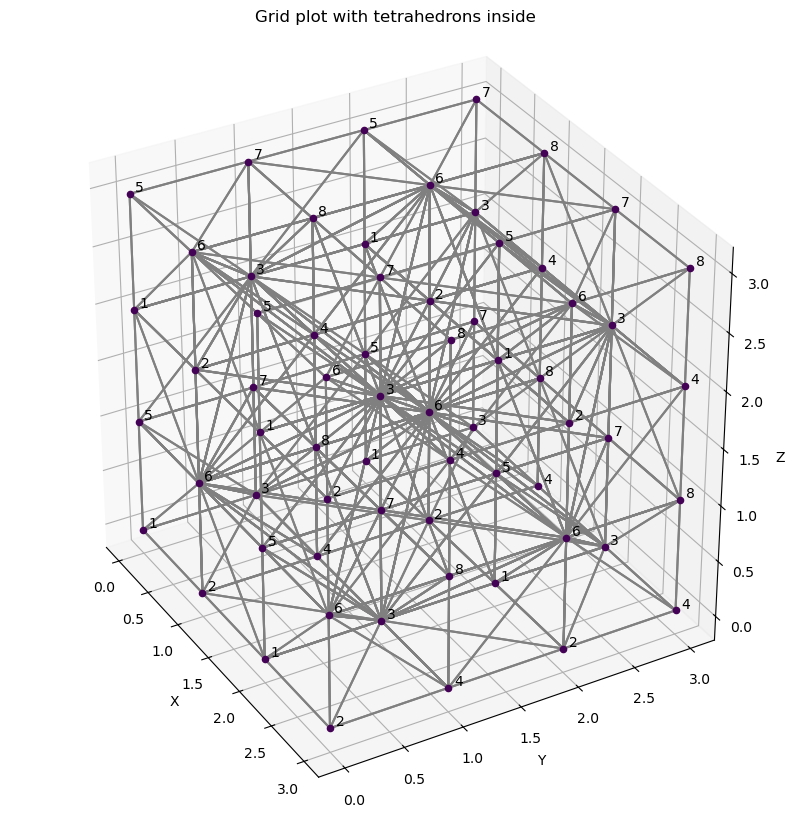

In [186]:
# Check how to adjacent six cube-tetrahedra behave, then do it with nine

x = 3
y = 3
z = 3
grid = np.ones((x+1, y+1, z+1), dtype=float)

fig = plt.figure()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
spacing = 0.03

# Plot the grid points with color based on the value of the grid
for i in range(x+1):
    for j in range(y+1):
        for k in range(z+1):
            ax.scatter(i, j, k, c=plt.cm.viridis(1), marker='o')
            ax.text(i+spacing, j+spacing, k+spacing, f'{get_number_from_global_coord((i,j,k))}', color='black')

def plot(pair_vetrices_connectivity, cube_coordinate):
    coord = from_vertex_connectivity_to_coord_connectivity(pair_vetrices_connectivity, cube_coordinate)
    for i in range(len(coord)):
        ax.plot([coord[i][0][0], coord[i][1][0]], [coord[i][0][1], coord[i][1][1]], [coord[i][0][2], coord[i][1][2]], color="gray")

for i in range(x):
    for j in range(y):
        for k in range(z):
            plot(cube_connectivity, (i,j,k))
            plot(add_connectivity(cube_6_tetrahedra), (i,j,k))

ax.view_init(elev=32, azim=330)

ax.set_box_aspect([x,y,z])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title("Grid plot with tetrahedrons inside")

plt.show()
